Adrians NoteBook

# Best Neighborhood in Pittsburgh – Sidewalk Walkability Metric

**Course:** CMPINF 0011  
**Team:** Team UHA  
**Author:** Adrian  

In this personal notebook, I analyze one sub-metric for our group final project:  
**sidewalk walkability**, measured using the ratio of sidewalk length to street length for different areas of Pittsburgh.

The goals of this notebook are to:

- Load and explore the sidewalk vs. street length data.
- Define a metric for “best” based on sidewalk coverage.
- Identify which areas are “best” by this metric.
- Write a personal conclusion that can be combined with my group’s other metrics in the final project.

In [1]:
%pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt

# Optional: if you want to try mapping later with neighborhoods.geojson
try:
    import geopandas as gpd
    HAS_GEOPANDAS = True
except ImportError:
    HAS_GEOPANDAS = False

HAS_GEOPANDAS


True

In [3]:
import os
os.listdir()

['sidewalkstreetratiotract.csv',
 'sidewalkstreetratioupload.csv',
 '.ipynb_checkpoints',
 'README.md',
 'neighborhoods.csv',
 'Aneesha.ipynb',
 'Presentation.ipynb',
 'Untitled.ipynb',
 '.git',
 'neighborhoods.json',
 'Adrian.ipynb',
 'Hallie.ipynb']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Try to import GeoPandas for mapping
try:
    import geopandas as gpd
    HAS_GEOPANDAS = True
except ImportError:
    HAS_GEOPANDAS = False

HAS_GEOPANDAS


True

## 1. Defining my metric: Sidewalk walkability

For my sub-metric, I define **“best”** as **most pedestrian-friendly**.

I measure this using a **sidewalk-to-street length ratio**.  
For each geographic area, the dataset includes:

- `SidewalkStepLFt`: total sidewalk length in feet  
- `StreetLFt`: total street length in feet  
- `Ratio`: `SidewalkStepLFt / StreetLFt`

A higher `Ratio` means that there is more sidewalk for each foot of street.  
Under my definition, areas with **higher ratios are “better” for walkability**.

In [5]:
# Load tract-level dataset
tract = pd.read_csv("sidewalkstreetratiotract.csv")

# Load block-group-level dataset (GEOID as string to avoid scientific notation issues)
block = pd.read_csv("sidewalkstreetratioupload.csv", dtype={"GEOID": "string"})

tract.head(), block.head()

(         Tract  SidewalkStepLFt     StreetLFt        Ratio
 0  42003010300      78448.71321   74592.98738  1.051690192
 1  42003020100     170043.96820  103496.13390  1.642998262
 2  42003020300      92663.56238  107882.68170  0.858928986
 3  42003030500      63741.19798   36574.88060  1.742758881
 4  42003040200      46788.76395   31603.32982  1.480501081,
         GEOID       NAMELSAD  SidewalkStepLFt    StreetLFt     Ratio
 0  4.2003E+11  Block Group 1      13392.83310  30315.86390  0.441776
 1  4.2003E+11  Block Group 2      31944.47597  20586.79493  1.551697
 2  4.2003E+11  Block Group 3      18655.20798  12122.70024  1.538866
 3  4.2003E+11  Block Group 4      14456.19616  11567.62831  1.249711
 4  4.2003E+11  Block Group 1      43952.94811  24426.52459  1.799394)

In [6]:
print("Tract-level data:")
display(tract.head())
print("\nInfo:")
print(tract.info())

print("\n\nBlock group-level data:")
display(block.head())
print("\nInfo:")
print(block.info())

Tract-level data:


,Tract,SidewalkStepLFt,StreetLFt,Ratio
0,42003010300,78448.71321,74592.98738,1.051690192
1,42003020100,170043.96820,103496.13390,1.642998262
2,42003020300,92663.56238,107882.68170,0.858928986
3,42003030500,63741.19798,36574.88060,1.742758881
4,42003040200,46788.76395,31603.32982,1.480501081



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tract            771 non-null    int64  
 1   SidewalkStepLFt  771 non-null    float64
 2   StreetLFt        771 non-null    float64
 3   Ratio            771 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 24.2+ KB
None


Block group-level data:


,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
0,4.2003E+11,Block Group 1,13392.83310,30315.86390,0.441776
1,4.2003E+11,Block Group 2,31944.47597,20586.79493,1.551697
2,4.2003E+11,Block Group 3,18655.20798,12122.70024,1.538866
3,4.2003E+11,Block Group 4,14456.19616,11567.62831,1.249711
4,4.2003E+11,Block Group 1,43952.94811,24426.52459,1.799394



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GEOID            2103 non-null   string 
 1   NAMELSAD         2103 non-null   object 
 2   SidewalkStepLFt  1080 non-null   float64
 3   StreetLFt        1100 non-null   float64
 4   Ratio            1100 non-null   float64
dtypes: float64(3), object(1), string(1)
memory usage: 82.3+ KB
None


## 2. Exploring the sidewalk/street ratio

In this section, I look at the distribution of the sidewalk-to-street ratio.  
I want to see:

- What the typical ratio looks like.
- Which tracts have the highest ratios.
- Whether there are any extreme outliers.


In [7]:
# Make sure the Ratio column is numeric so we can analyze and plot it
tract["Ratio"] = pd.to_numeric(tract["Ratio"], errors="coerce")

# Sort tracts by Ratio, highest first
best_tracts = tract.sort_values("Ratio", ascending=False)

print("Data type of Ratio:", tract["Ratio"].dtype)
best_tracts.head(10)

Data type of Ratio: float64


,Tract,SidewalkStepLFt,StreetLFt,Ratio
11,42003050900,34060.43485,5125.794855,6.644908
401,42003982200,51352.28584,12695.022100,4.045073
399,42003981200,31844.77914,10014.352300,3.179914
388,42003980000,11466.92769,3707.451180,3.092941
13,42003051100,21923.74413,7265.428071,3.017543
88,42003260900,58729.59554,21650.722550,2.712593
12,42003051000,43118.82257,16923.273120,2.547901
363,42003561200,38381.61857,17396.215870,2.206320
25,42003080900,38603.78731,17756.642170,2.174048
43,42003120800,58309.53547,27154.436550,2.147330


In [8]:
print("Missing values in tract data:")
print(tract.isna().sum())

print("\nMissing values in block group data:")
print(block.isna().sum())

print("\nAny tracts with zero street length?")
print((tract["StreetLFt"] == 0).sum())

print("\nAny block groups with zero street length?")
print((block["StreetLFt"] == 0).sum())

Missing values in tract data:
Tract                0
SidewalkStepLFt      0
StreetLFt            0
Ratio              369
dtype: int64

Missing values in block group data:
GEOID                 0
NAMELSAD              0
SidewalkStepLFt    1023
StreetLFt          1003
Ratio              1003
dtype: int64

Any tracts with zero street length?
369

Any block groups with zero street length?
0


## 3. Visualizing top areas by sidewalk coverage

Here I make a simple bar chart of the areas with the highest sidewalk-to-street ratios.
This helps me see which places look most walkable according to my metric.


In [9]:
# Check the data types of the columns
print(tract.dtypes)
print("\nTop of the best_tracts DataFrame:")
print(best_tracts.head())

Tract                int64
SidewalkStepLFt    float64
StreetLFt          float64
Ratio              float64
dtype: object

Top of the best_tracts DataFrame:
           Tract  SidewalkStepLFt     StreetLFt     Ratio
11   42003050900      34060.43485   5125.794855  6.644908
401  42003982200      51352.28584  12695.022100  4.045073
399  42003981200      31844.77914  10014.352300  3.179914
388  42003980000      11466.92769   3707.451180  3.092941
13   42003051100      21923.74413   7265.428071  3.017543


In [10]:
# Make sure Ratio is numeric
tract["Ratio"] = pd.to_numeric(tract["Ratio"], errors="coerce")

# If you already created best_tracts before converting,
# recreate it so it uses the numeric Ratio
best_tracts = tract.sort_values("Ratio", ascending=False)

# Check to confirm Ratio is now numeric
print(tract["Ratio"].dtype)


float64


The bar chart below visualizes the top 15 tracts by sidewalk-to-street ratio. This makes it easy to compare walkability across areas and identify which tracts stand out the most.

<Figure size 640x480 with 0 Axes>

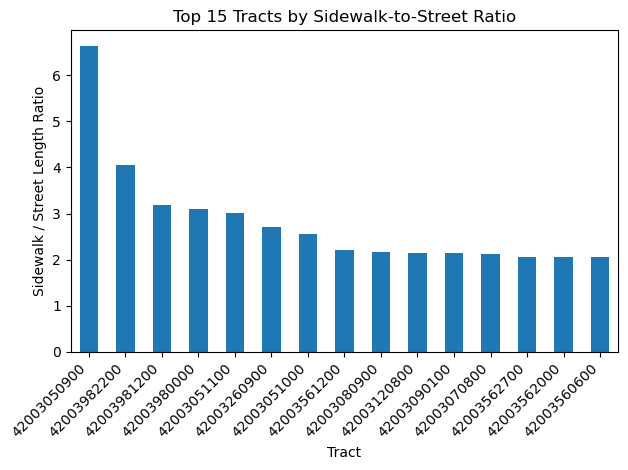

In [11]:
# Plot the top 15 tracts by Ratio
top_n = 15
top_tracts = best_tracts.head(top_n)

plt.figure()
top_tracts.plot(
    x="Tract",
    y="Ratio",
    kind="bar",
    legend=False
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sidewalk / Street Length Ratio")
plt.title(f"Top {top_n} Tracts by Sidewalk-to-Street Ratio")
plt.tight_layout()
plt.show()

## 4. Neighborhood shapes (optional GeoPandas step)

Our group is also using the official Pittsburgh neighborhood boundaries from WPRDC.
Here I load the `neighborhoods.geojson` file and do a simple plot just to show the map.

In our combined group notebook, we can connect my sidewalk metric to these neighborhoods.


,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_user,created_date,last_edited_user,last_edited_date,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:02:13+00:00,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:02:41+00:00,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 12:59:55+00:00,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.9353 40.4725..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 12:58:41+00:00,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.4552, -79.96595 40.4548..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:00:19+00:00,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."



Columns in neighborhoods GeoJSON:
Index(['OBJECTID', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'perimeter', 'neighbor_', 'neighbor_i', 'hood', 'hood_no',
       'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors', 'shape_le_1',
       'shape_ar_1', 'page_number', 'plannerassign', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'temp',
       'pghdb_sde_Neighborhood_2010_are', 'GlobalID', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')


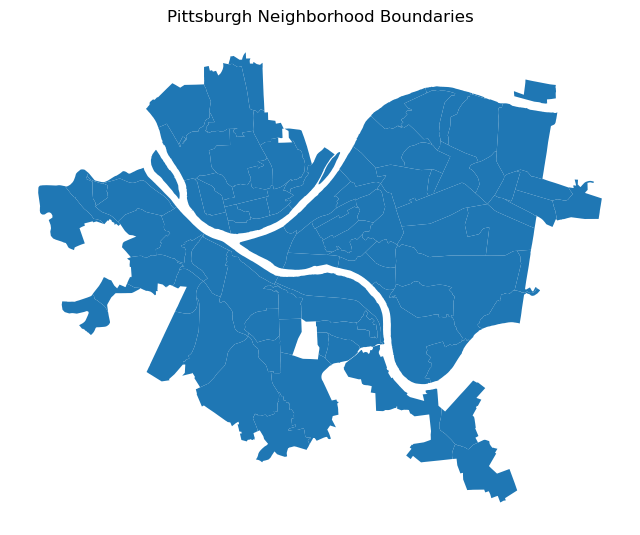

In [12]:
HOODS_URL = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/neighborhoods.geojson"

if HAS_GEOPANDAS:
    # Read neighborhood boundaries directly from the URL
    hoods = gpd.read_file(HOODS_URL)

    # Quick preview
    display(hoods.head())
    print("\nColumns in neighborhoods GeoJSON:")
    print(hoods.columns)

    # Simple map of neighborhoods
    hoods.plot(figsize=(8, 8))
    plt.title("Pittsburgh Neighborhood Boundaries")
    plt.axis("off")
    plt.show()
else:
    print("GeoPandas is not installed in this environment, so I cannot run this cell here.")

## 5. Results: Which areas are “best” by sidewalk walkability?

Now I look at which tracts come out on top according to my metric.  
Remember, a higher sidewalk/street ratio = more sidewalk per foot of road,  
which I interpret as **more walkable and pedestrian-friendly**.


In [13]:
best_tracts.head(5)[["Tract", "SidewalkStepLFt", "StreetLFt", "Ratio"]]

,Tract,SidewalkStepLFt,StreetLFt,Ratio
11,42003050900,34060.43485,5125.794855,6.644908
401,42003982200,51352.28584,12695.022100,4.045073
399,42003981200,31844.77914,10014.352300,3.179914
388,42003980000,11466.92769,3707.451180,3.092941
13,42003051100,21923.74413,7265.428071,3.017543


From the table above, the top 5 tracts by sidewalk/street ratio are:

- Tract 3050900 - Shadyside
- Tract 3982200 - Downtown (Central Buisness District)
- Tract 3981200 - Southside Flats (E Carson St area)
- Tract 3980000 - Southside Flats (West Side, Station Square/hillside base.)
- Tract 3051100 - Shadyside (North, borders Bloomfeild line and Baum / Centre corridor.)

In my interpretation, these tracts are the **“best” areas for sidewalk walkability** because they dedicate more infrastructure to pedestrians compared to cars (per unit of street length).

Later, as a group, we can connect these tracts to their neighborhoods and combine this metric with other metrics (like hills, safety, etc.) to choose our final “best neighborhood”.


## 6. Personal conclusion

For my part of the project, I defined “best” as **most walkable**, based on the sidewalk-to-street length ratio.

Using this metric, I found that some tracts have much higher ratios than others, which suggests they provide better sidewalk coverage and may be more comfortable for pedestrians. This is one small piece of what makes a neighborhood “best,” but it shows how we can use data to measure something that people usually describe in a vague way (like “this place is nice to walk around”).

Compared to my personal experience, my favorite neighborhoods are often places where it feels easy and safe to walk, which fits this metric pretty well. However, I also know that other factors matter too, like hills, access to stores and buses, safety, and community spaces. That is why our group will combine my sidewalk walkability metric with my teammates’ metrics to pick a final “best neighborhood in Pittsburgh.”
